<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 33** | inferência
Caderno de **exercício 01**<br>




## Discente: Samuel Saturno

## Importando as Bibliotecas

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import scipy.stats as st


## Carregando o Dataset

In [6]:
pg = sns.load_dataset('penguins')

In [7]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

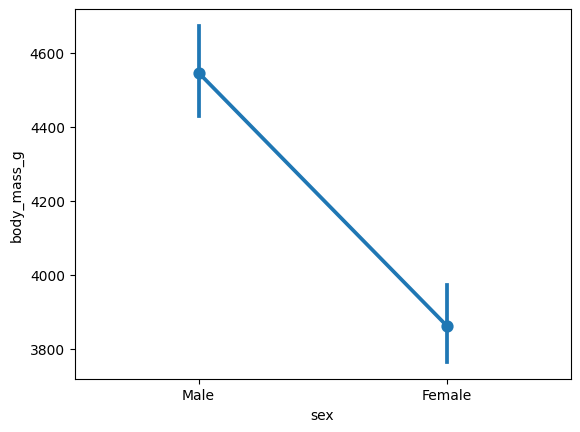

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [17]:
# Filtrar os dados para obter apenas machos e fêmeas
machos = pg[pg['sex'] == 'Male']['body_mass_g']
femeas = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(machos, femeas)

# Imprimir o resultado
print("Estatística t:", t_stat)
print("Valor p:", p_value)

# Verificar se a diferença é estatisticamente significativa com 5% de significância
alpha = 0.05
if p_value < alpha:
    print("A diferença de peso entre machos e fêmeas é estatisticamente significativa.")
else:
    print("Não há evidências suficientes para concluir que há diferença de peso entre machos e fêmeas.")


Estatística t: 8.541720337994516
Valor p: 4.897246751596224e-16
A diferença de peso entre machos e fêmeas é estatisticamente significativa.


<h3><font  color="blue"><strong> insight 01 </strong></font></h3>

<h3><font  color=""><i>
Os resultados do teste t é bastante revelador. Com uma estatística t de 8.54 e um valor p extremamente baixo (aproximadamente 4.90e-16), podemos concluir com confiança que há uma diferença estatisticamente significativa de peso entre machos e fêmeas de pinguins. Isso sugere que existe uma diferença substancial de peso entre as duas populações de pinguins, com uma confiança estatística muito alta.
</i></font></h3>



## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

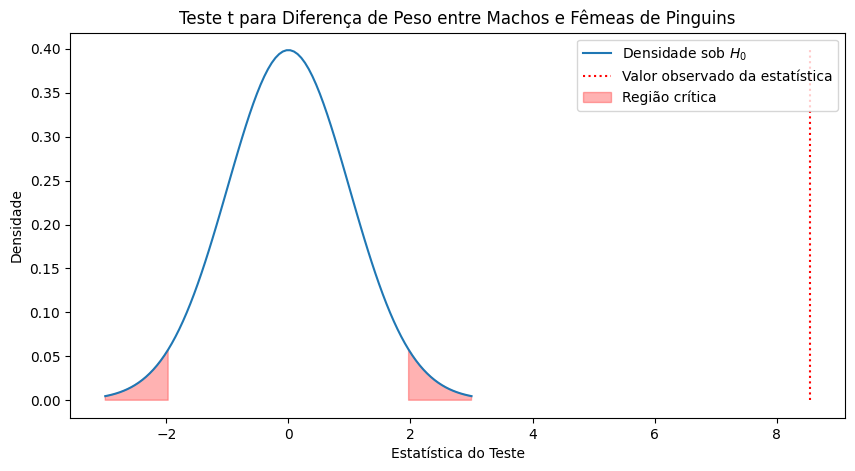

In [18]:
# Filtrar os dados para obter apenas machos e fêmeas
machos = pg[pg['sex'] == 'Male']['body_mass_g']
femeas = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste t
t_stat, p_value = st.ttest_ind(machos, femeas)

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, len(machos) + len(femeas) - 2)

# Definir o início e o fim da região crítica do teste
low = st.t.ppf(0.025, len(machos) + len(femeas) - 2)  # 2.5% de significância (teste bilateral)
high = st.t.ppf(0.975, len(machos) + len(femeas) - 2)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Densidade sob H0
ax.plot(x, y, label='Densidade sob $H_0$')

# Linha vertical para o valor observado da estatística do teste
ax.vlines(x=[t_stat], ymin=0, ymax=max(y), colors='r', linestyles='dotted', label='Valor observado da estatística')

# Área crítica
plt.fill_between(x, y, where=(x < low) | (x > high), color='red', alpha=0.3, label='Região crítica')

# Títulos e legenda
ax.set_title('Teste t para Diferença de Peso entre Machos e Fêmeas de Pinguins')
ax.set_xlabel('Estatística do Teste')
ax.set_ylabel('Densidade')
ax.legend()

plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [22]:
import pandas as pd
from scipy import stats
import seaborn as sns

# Carregar o conjunto de dados penguins
pg = sns.load_dataset('penguins')

# Obter as espécies únicas de pinguins
especies = pg['species'].unique()

# Iterar sobre cada espécie
for especie in especies:
    # Filtrar os dados para a espécie atual
    dados_especie = pg[pg['species'] == especie]
    machos = dados_especie[dados_especie['sex'] == 'Male']['body_mass_g']
    femeas = dados_especie[dados_especie['sex'] == 'Female']['body_mass_g']

    # Realizar o teste t
    t_stat, p_value = stats.ttest_ind(machos, femeas)

    # Imprimir os resultados para a espécie atual
    print(f"\nEspécie: {especie}")
    print("Estatística t:", t_stat)
    print("Valor p:", p_value)

    # Verificar se a diferença é estatisticamente significativa com 5% de significância
    alpha = 0.05
    if p_value < alpha:
        print("A diferença de peso entre machos e fêmeas é estatisticamente significativa.")
    else:
        print("Não há evidências suficientes para concluir que há diferença de peso entre machos e fêmeas.")



Espécie: Adelie
Estatística t: 13.126285923485874
Valor p: 2.2206436307866114e-26
A diferença de peso entre machos e fêmeas é estatisticamente significativa.

Espécie: Chinstrap
Estatística t: 5.20773384899266
Valor p: 2.043956471470739e-06
A diferença de peso entre machos e fêmeas é estatisticamente significativa.

Espécie: Gentoo
Estatística t: 14.721676481405709
Valor p: 2.133687602018886e-28
A diferença de peso entre machos e fêmeas é estatisticamente significativa.


<h3><font  color="blue"><strong> insight 02 </strong></font></h3>

<h3><font  color=""><i>
Os resultados dos testes t para cada espécie de pinguim são bastante significativos e revelam diferenças consistentes de peso entre machos e fêmeas em todas as espécies analisadas.
</i></font></h3>
<h3><font  color=""><i>
Para a espécie Adelie, a estatística t é bastante alta, aproximadamente 13.13, e o valor p é extremamente baixo (aproximadamente 2.22e-26). Isso indica uma diferença de peso altamente significativa entre machos e fêmeas.
</i></font></h3>
<h3><font  color=""><i>
Para a espécie Chinstrap, a estatística t é significativa, aproximadamente 5.21, e o valor p é bastante baixo (aproximadamente 2.04e-06), indicando também uma diferença de peso estatisticamente significativa entre machos e fêmeas.
</i></font></h3>
<h3><font  color=""><i>
Finalmente, para a espécie Gentoo, a estatística t é ainda mais alta, aproximadamente 14.72, e o valor p é extremamente baixo (aproximadamente 2.13e-28), revelando uma diferença de peso altamente significativa entre machos e fêmeas.
</i></font></h3>


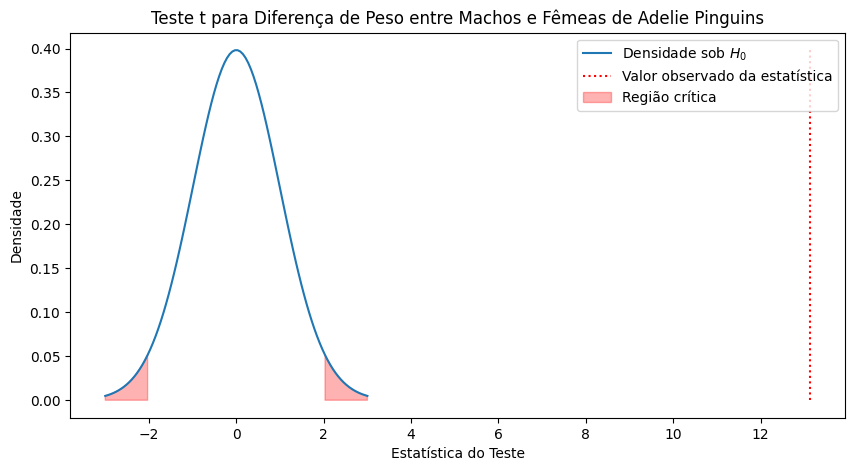

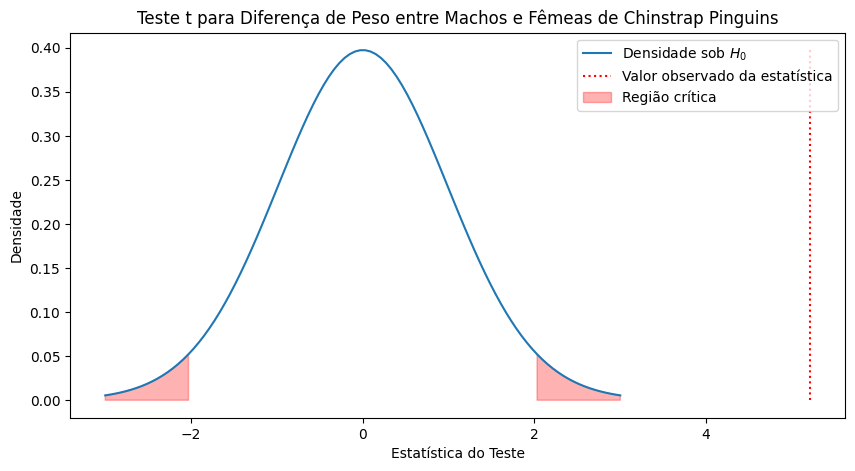

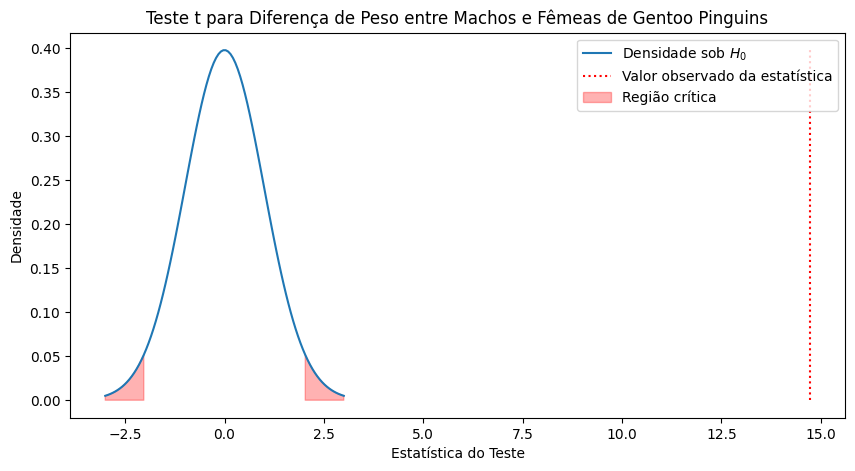

In [23]:
# Obter as espécies únicas de pinguins
especies = pg['species'].unique()

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Definir o nível de significância
alpha = 0.05

# Iterar sobre cada espécie
for especie in especies:
    # Filtrar os dados para a espécie atual
    dados_especie = pg[pg['species'] == especie]
    machos = dados_especie[dados_especie['sex'] == 'Male']['body_mass_g']
    femeas = dados_especie[dados_especie['sex'] == 'Female']['body_mass_g']

    # Realizar o teste t
    t_stat, p_value = st.ttest_ind(machos, femeas)

    # Valores de X e Y para plotar a densidade
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = st.t.pdf(x, len(machos) + len(femeas) - 2)

    # Iniciar o plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Densidade sob H0
    ax.plot(x, y, label='Densidade sob $H_0$')

    # Linha vertical para o valor observado da estatística do teste
    ax.vlines(x=[t_stat], ymin=0, ymax=max(y), colors='r', linestyles='dotted', label='Valor observado da estatística')

    # Definir o início e o fim da região crítica do teste
    low = st.t.ppf(alpha / 2, len(machos) + len(femeas) - 2)  # Região crítica de dois lados
    high = st.t.ppf(1 - alpha / 2, len(machos) + len(femeas) - 2)

    # Área crítica
    plt.fill_between(x, y, where=(x < low) | (x > high), color='red', alpha=0.3, label='Região crítica')

    # Títulos e legenda
    ax.set_title(f'Teste t para Diferença de Peso entre Machos e Fêmeas de {especie} Pinguins')
    ax.set_xlabel('Estatística do Teste')
    ax.set_ylabel('Densidade')
    ax.legend()

    plt.show()
